In [108]:
import numpy as np
from numpy import linalg as LA
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [109]:
f = lambda x: x[0]**2 + x[1]**2
x_0 = np.array([-5, 2], dtype = float)


In [110]:
def num_grad(f, x, h = 10**-6):
    n = x.size
    e_i = np.identity(n)
    # List Comprehension / Dictionary Comprehension
    g = [(f(x + e_i[i, ] * h / 2) - f(x - e_i[i, ] * h / 2)) / (h) for i in range(n)]
    
    return(np.array(g, dtype = float))
    

In [111]:
def barzilai_borwein(f, x, a_0 = 0.1, max_iter = 100):
    result = {'x_opt': x,
              'f_opt': f(x),
              'x_hist': [x],
              'f_hist': [f(x)]
             }

    for k in range(max_iter):
        x_new = x - a_0 * num_grad(f, x)
        a_0 = (x_new - x)*(num_grad(f, x_new) - num_grad(f, x))/(LA.norm(num_grad(f, x_new) - num_grad(f, x))**2)
        result['x_opt'] = x 
        result['f_opt'] = f(x)
        result['x_hist'].append(x)
        result['f_hist'].append(f(x))     
        x = x_new
    return(result)


In [112]:
bb = barzilai_borwein(f, x_0, a_0 = 0.1)

In [113]:
def grad_descent(f, x, a = 0.1, max_iter = 100):
    result = {'x_opt': x,
              'f_opt': f(x),
              'x_hist': [x],
              'f_hist': [f(x)]
             }

    for k in range(max_iter):
        x = x - a * num_grad(f, x)
    
        result['x_opt'] = x 
        result['f_opt'] = f(x)
        result['x_hist'].append(x)
        result['f_hist'].append(f(x))     
    
    return(result)

gd = grad_descent(f, x_0, a = 0.1)

In [114]:
import matplotlib.pyplot as plt

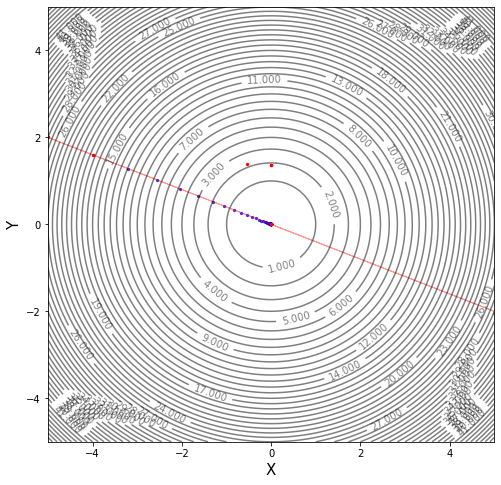

In [122]:
x_gd = list(zip(*gd['x_hist']))
x_bb = list(zip(*bb['x_hist']))
n_grid = 100
x_seq = np.linspace(-5, 5, n_grid)
f_val = np.zeros((n_grid, n_grid))

for x in range(n_grid):
    for y in range(n_grid):
        f_val[y][x] = f((x_seq[x], x_seq[y])) 

plt.figure(figsize = (8, 8))

contours = plt.contour(x_seq, x_seq, f_val, levels = 50, colors = 'black', alpha = 0.5)

plt.scatter(x_gd[0], x_gd[1], color = 'blue', alpha = 0.7, s = 5, zorder = 1)
plt.scatter(x_bb[0], x_bb[1], color = 'red', alpha = 1, s = 5, zorder = 2)
# Plot gradient
nabla = num_grad(f, x_0)
plt.arrow(*x_0, -nabla[0], -nabla[1], color = 'red', head_width = 0.15, alpha = 0.4)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.clabel(contours, fontsize = 10)
plt.show()

In [124]:
bb



{'x_opt': array([nan, nan]),
 'f_opt': nan,
 'x_hist': [array([-5.,  2.]),
  array([-5.,  2.]),
  array([-4. ,  1.6]),
  array([-0.55172413,  1.37931034]),
  array([-0.00225064,  1.37368373]),
  array([-2.36035314e-07,  1.37353971e+00]),
  array([-9.64740992e-10,  1.36793664e+00]),
  array([-9.6474099e-10,  1.2577642e-08]),
  array([-9.6474099e-10,  1.9039547e-18]),
  array([-9.64740990e-10,  3.57529433e-23]),
  array([-9.64740990e-10,  3.57529433e-23]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, na

In [125]:
gd


{'x_opt': array([-1.01851799e-09,  4.07407195e-10]),
 'f_opt': 1.2033595152654146e-18,
 'x_hist': [array([-5.,  2.]),
  array([-4. ,  1.6]),
  array([-3.2 ,  1.28]),
  array([-2.56 ,  1.024]),
  array([-2.048 ,  0.8192]),
  array([-1.6384 ,  0.65536]),
  array([-1.31072 ,  0.524288]),
  array([-1.048576 ,  0.4194304]),
  array([-0.8388608 ,  0.33554432]),
  array([-0.67108864,  0.26843546]),
  array([-0.53687091,  0.21474836]),
  array([-0.42949673,  0.17179869]),
  array([-0.34359738,  0.13743895]),
  array([-0.27487791,  0.10995116]),
  array([-0.21990233,  0.08796093]),
  array([-0.17592186,  0.07036874]),
  array([-0.14073749,  0.056295  ]),
  array([-0.11258999,  0.045036  ]),
  array([-0.09007199,  0.0360288 ]),
  array([-0.07205759,  0.02882304]),
  array([-0.05764608,  0.02305843]),
  array([-0.04611686,  0.01844674]),
  array([-0.03689349,  0.0147574 ]),
  array([-0.02951479,  0.01180592]),
  array([-0.02361183,  0.00944473]),
  array([-0.01888947,  0.00755579]),
  array([-0.0